In [20]:
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox

In [22]:
#map of mysore
G = ox.graph_from_place("Mysuru, Karnataka, India", network_type="drive")


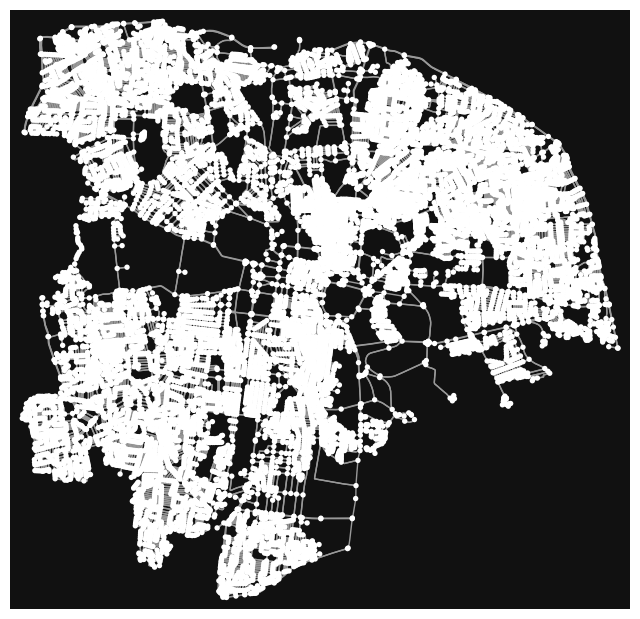

In [24]:
#print the map
fig, ax = ox.plot_graph(G)
plt.show()

In [28]:
#get hospitaals
hospitals = ox.features_from_place(
    "Mysuru, Karnataka, India",
    tags={"amenity": "hospital"}
)

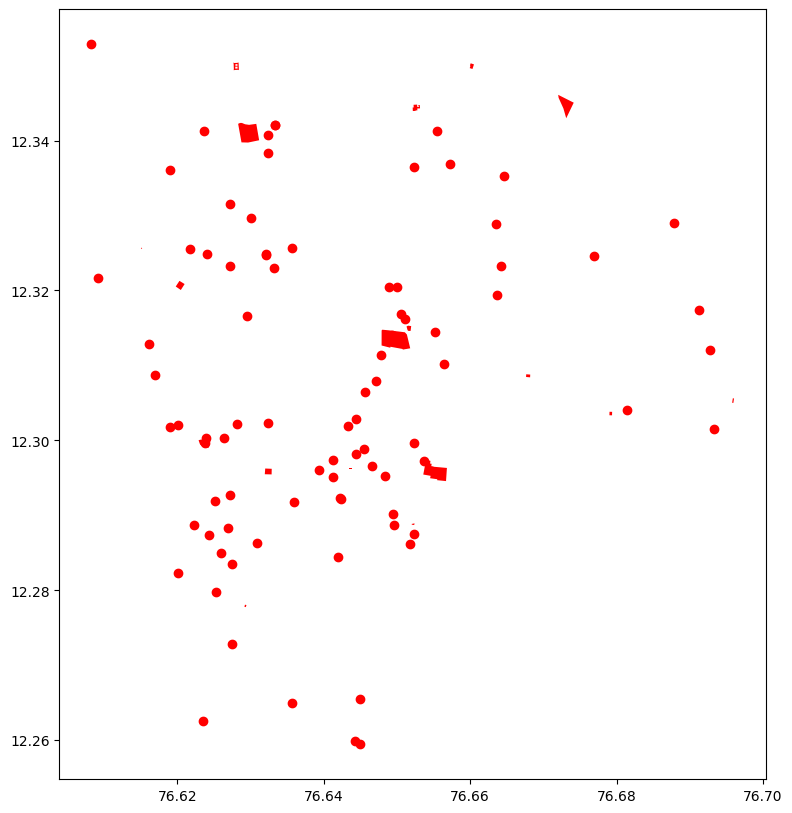

In [29]:
hospitals.plot(figsize=(10,10), color='red')
plt.show()

In [30]:
hospitals

geometry  \
element id                                                              
node    465192842                           POINT (76.63239 12.33832)   
        465196073                           POINT (76.62718 12.33155)   
        542383450                            POINT (76.64234 12.2922)   
        1221006184                          POINT (76.64496 12.26551)   
        1636785470                          POINT (76.64129 12.29514)   
...                                                               ...   
way     475505915   POLYGON ((76.62946 12.27802, 76.62926 12.27808...   
        498147947   POLYGON ((76.67903 12.30382, 76.67902 12.30335...   
        525517808   POLYGON ((76.62982 12.3421, 76.6308 12.34223, ...   
        741179471   POLYGON ((76.66007 12.35031, 76.66052 12.35016...   
        1428214845  POLYGON ((76.66334 12.32891, 76.66319 12.3288,...   

                     amenity emergency                                name  \
element id                                                                   
node    465192842   hospital       yes                        ESI Hospital   
        465196073   hospital       NaN           Adithya Adhikari Hospital   
        542383450   hospital       NaN                       Ashoka Clinic   
        1221006184  hospital       NaN                 Bone & Joint Clinic   
        1636785470  hospital        no                  Clumax Diagnostics   
...                      ...       ...                                 ...   
way     475505915   hospital       NaN                Arvinda Nursing Home   
        498147947   hospital       NaN                    MRC Eye Hospital   
        525517808   hospital       NaN                    P. K. Sanitorium   
        741179471   hospital       NaN                    Manipal Hospital   
        1428214845  hospital       NaN  Srinivasa Multispeciality Hospital   

                                 name:kn addr:district  \
element id                                               
node    465192842         ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ           NaN   
        465196073        ಆದಿತ್ಯ ಆಸ್ಪತ್ರೆ        Mysuru   
        542383450                    NaN           NaN   
        1221006184                   NaN           NaN   
        1636785470                   NaN           NaN   
...                                  ...           ...   
way     475505915   ಅರವಿಂದ ನರ್ಸಿಂಗ್ ಹೋಮ್        Mysuru   
        498147947                    NaN           NaN   
        525517808                    NaN           NaN   
        741179471        ಮಣಿಪಾಲ ಆಸ್ಪತ್ರೆ        Mysuru   
        1428214845                   NaN           NaN   

                                                            addr:full  \
element id                                                              
node    465192842                                                 NaN   
        465196073   417 Contour Road, Gokulam Ii Nd Stag Near Vija...   
        542383450                                                 NaN   
        1221006184                                                NaN   
        1636785470                                                NaN   
...                                                               ...   
way     475505915                     No. 644, 4Th Main, Arvind Nagar   
        498147947                                                 NaN   
        525517808                                                 NaN   
        741179471                 Siddique Nagar, Bannimantap, Mysuru   
        1428214845                                                NaN   

                   addr:postcode addr:state healthcare  ... website alt_name  \
element id                                              ...                    
node    465192842            NaN        NaN        NaN  ...     NaN      NaN   
        465196073         570002  Karnataka   hospital  ...     NaN      NaN   
        542383450            NaN        NaN        NaN  ...     NaN    

In [31]:
#print column names in hospitals
hospitals.columns

Index(['geometry', 'amenity', 'emergency', 'name', 'name:kn', 'addr:district',
       'addr:full', 'addr:postcode', 'addr:state', 'healthcare', 'source',
       'designation', 'addr:city', 'addr:housenumber', 'addr:street',
       'name:en', 'operator', 'operator:short', 'operator:wikidata',
       'description', 'ele', 'email', 'healthcare:speciality', 'operator:type',
       'website', 'alt_name', 'building', 'name:etymology:wikidata',
       'wikidata', 'wikimedia_commons', 'wikipedia', 'phone', 'type',
       'name:tr'],
      dtype='object')

In [32]:
locs = hospitals['geometry']

In [33]:
#find hospital row  with id 498147947
hospital_498147947 = hospitals[hospitals['name'] == "ESI Hospital"]
hospital_498147947

geometry   amenity emergency  \
element id                                                          
node    465192842   POINT (76.63239 12.33832)  hospital       yes   
        7562027211  POINT (76.64719 12.30793)  hospital       NaN   

                            name         name:kn addr:district  \
element id                                                       
node    465192842   ESI Hospital  ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ           NaN   
        7562027211  ESI Hospital  ಇಎಸ್ಐ ಆಸ್ಪತ್ರೆ        Mysuru   

                                                            addr:full  \
element id                                                              
node    465192842                                                 NaN   
        7562027211  ESI Hospital Road, Subbarayanakere, Chamrajpur...   

                   addr:postcode addr:state healthcare  ... website alt_name  \
element id                                              ...                    
node    465192842            NaN        NaN        NaN  ...     NaN      NaN   
        7562027211        570004  Karnataka   hospital  ...     NaN      NaN   

                   building name:etymology:wikidata wikidata  \
element id                                                     
node    465192842       NaN                     NaN      NaN   
        7562027211      NaN                     NaN      NaN   

                   wikimedia_commons wikipedia phone type name:tr  
element id                                                         
node    465192842                NaN       NaN   NaN  NaN     NaN  
        7562027211               NaN       NaN   NaN  NaN     NaN  

[2 rows x 34 columns]

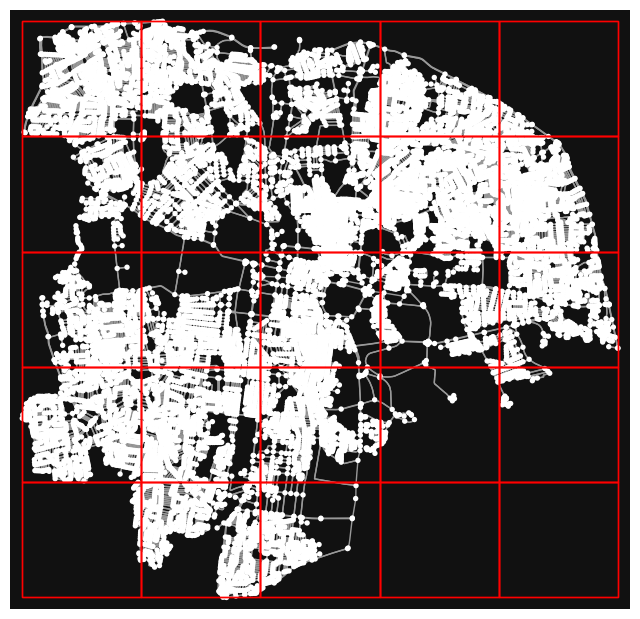

In [34]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import geopandas as gpd
from shapely.geometry import box

nodes_gdf, edges_gdf = ox.graph_to_gdfs(G)   # returns (nodes_gdf, edges_gdf)
bounds = edges_gdf.total_bounds              # [minx, miny, maxx, maxy]

minx, miny, maxx, maxy = bounds
nx = 5
ny = 5
x_step = (maxx - minx) / nx
y_step = (maxy - miny) / ny

zones = []
zone_polys = []
for i in range(nx):
    for j in range(ny):
        zminx = minx + i * x_step
        zminy = miny + j * y_step
        zmaxx = minx + (i + 1) * x_step
        zmaxy = miny + (j + 1) * y_step
        zone = (zminx, zminy, zmaxx, zmaxy)
        zones.append(zone)
        zone_polys.append(box(zminx, zminy, zmaxx, zmaxy))

# create a single GeoDataFrame with all zones
zones_gdf = gpd.GeoDataFrame({
    'zone_id': range(len(zone_polys)),
    'i': [int(idx // ny) for idx in range(len(zone_polys))],
    'j': [int(idx % ny) for idx in range(len(zone_polys))],
    'geometry': zone_polys
}, crs=nodes_gdf.crs)

# also create individual GeoDataFrames per zone (list)
zone_gdfs = []
for idx, geom in enumerate(zone_polys):
    gdf = gpd.GeoDataFrame({'zone_id':[idx], 'geometry':[geom]}, crs=nodes_gdf.crs)
    zone_gdfs.append(gdf)

fig, ax = ox.plot_graph(G, show=False, close=False)
if isinstance(ax, (list, tuple, np.ndarray)):
    ax = ax[0]

for zone in zones:
    zminx, zminy, zmaxx, zmaxy = zone
    rect = Rectangle((zminx, zminy), zmaxx - zminx, zmaxy - zminy,
                     fill=False, edgecolor='red', linewidth=1, zorder=3)
    ax.add_patch(rect)

# plot combined zones GeoDataFrame on top
zones_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1, zorder=4)

plt.show()


In [35]:
# Print zones and hospitals per zone
import geopandas as gpd
# show overall shapes and columns
print('zones_gdf shape:', zones_gdf.shape)
print('zones_gdf columns:', list(zones_gdf.columns))
print('hospitals shape (before):', hospitals.shape)
print('hospitals columns:', list(hospitals.columns))

# ensure CRS match for spatial join
if hospitals.crs != zones_gdf.crs:
    hospitals = hospitals.to_crs(zones_gdf.crs)

# spatial join: attach zone_id to each hospital (if any)
joined = gpd.sjoin(hospitals, zones_gdf[['zone_id','geometry']], how='left', predicate='within')

# iterate zones and print counts and a few rows
for idx, zrow in zones_gdf.iterrows():
    zid = zrow['zone_id']
    zone_hosp = joined[joined['zone_id'] == zid] if 'zone_id' in joined.columns else joined[[]]
    print(f"Zone {zid} (i={zrow.get('i')}, j={zrow.get('j')}): {len(zone_hosp)} hospitals; hospitals shape: {zone_hosp.shape}")
    if len(zone_hosp) > 0:
        # print up to 5 hospital rows (name and geometry)
        cols = [c for c in ['name','geometry'] if c in zone_hosp.columns]
        print(zone_hosp[cols].head())

# list zones with no hospitals
empty_zones = [int(zrow['zone_id']) for _, zrow in zones_gdf.iterrows() if len(joined[joined['zone_id'] == zrow['zone_id']]) == 0]
print('Zones with no hospitals:', empty_zones)

zones_gdf shape: (25, 4)
zones_gdf columns: ['zone_id', 'i', 'j', 'geometry']
hospitals shape (before): (105, 34)
hospitals columns: ['geometry', 'amenity', 'emergency', 'name', 'name:kn', 'addr:district', 'addr:full', 'addr:postcode', 'addr:state', 'healthcare', 'source', 'designation', 'addr:city', 'addr:housenumber', 'addr:street', 'name:en', 'operator', 'operator:short', 'operator:wikidata', 'description', 'ele', 'email', 'healthcare:speciality', 'operator:type', 'website', 'alt_name', 'building', 'name:etymology:wikidata', 'wikidata', 'wikimedia_commons', 'wikipedia', 'phone', 'type', 'name:tr']
Zone 0 (i=0, j=0): 0 hospitals; hospitals shape: (0, 36)
Zone 1 (i=0, j=1): 0 hospitals; hospitals shape: (0, 36)
Zone 2 (i=0, j=2): 3 hospitals; hospitals shape: (3, 36)
                                                                 name  \
element id                                                              
node    7202979471  All India Institute of Speech and Hearing, Mysore   
  

City CRS: epsg:4326
Zones CRS (lat lon): epsg:4326
Zones CRS (projected): EPSG:32643
Total zones: 25
Centroids inside city: 17
Centroids outside city: 8

Zones whose centroids lie OUTSIDE Mysuru boundary:
    zone_id  i  j                   centroid  centroid_inside_city
0         0  0  0  POINT (76.60908 12.26351)                 False
3         3  0  3  POINT (76.60908 12.32412)                 False
5         5  1  0  POINT (76.63047 12.26351)                 False
15       15  3  0  POINT (76.67324 12.26351)                 False
16       16  3  1  POINT (76.67324 12.28371)                 False
20       20  4  0  POINT (76.69462 12.26351)                 False
21       21  4  1  POINT (76.69462 12.28371)                 False
24       24  4  4  POINT (76.69462 12.34432)                 False


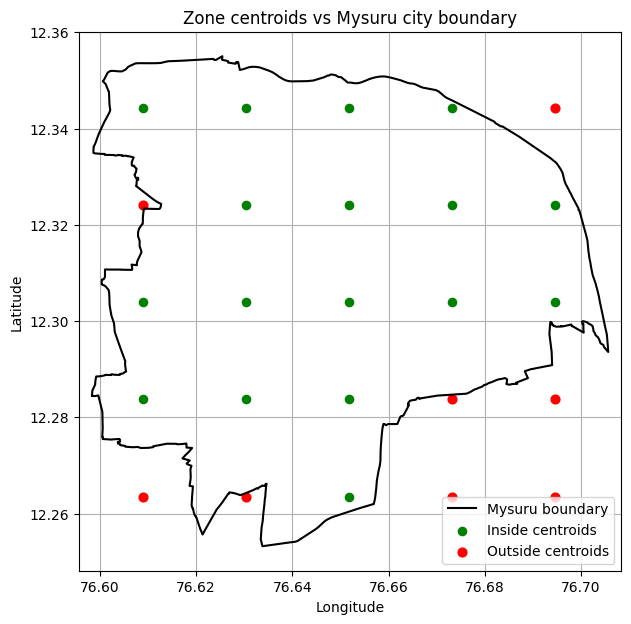

In [41]:
from shapely.geometry import Point

#Get Mysuru boundary and make sure it is in WGS84 (lat lon)
place = "Mysuru, Karnataka, India"
city_gdf = ox.geocode_to_gdf(place)
city_gdf = city_gdf.to_crs(epsg=4326)
city_poly = city_gdf.geometry.iloc[0]

print("City CRS:", city_gdf.crs)

#Make sure zones_gdf has a CRS and is in WGS84 (lat lon)
if zones_gdf.crs is None:
    # if your zones were created directly from lat lon, set CRS as WGS84
    zones_gdf = zones_gdf.set_crs(epsg=4326)
else:
    zones_gdf = zones_gdf.to_crs(epsg=4326)

print("Zones CRS (lat lon):", zones_gdf.crs)

#for accurate centroid calculation
#Mysore is in UTM zone 43N EPSG 32643
zones_proj = zones_gdf.to_crs(epsg=32643)
print("Zones CRS (projected):", zones_proj.crs)

#Compute centroids in projected CRS (this avoids the warning)
zones_proj["centroid_proj"] = zones_proj.geometry.centroid

#Convert centroids back to WGS84 (for lat, lon)
centroids_ll = zones_proj["centroid_proj"].to_crs(epsg=4326)

#Attach centroids in lat lon to the original zones_gdf
zones_gdf["centroid"] = centroids_ll

#Check which centroids are inside the Mysuru polygon
zones_gdf["centroid_inside_city"] = zones_gdf["centroid"].apply(
    lambda p: city_poly.contains(p)
)

inside_zones = zones_gdf[zones_gdf["centroid_inside_city"] == True]
outside_zones = zones_gdf[zones_gdf["centroid_inside_city"] == False]

print("Total zones:", len(zones_gdf))
print("Centroids inside city:", len(inside_zones))
print("Centroids outside city:", len(outside_zones))

# Show basic info for outside zones
cols_to_show = []
for c in ["zone_id", "i", "j", "centroid", "centroid_inside_city"]:
    if c in zones_gdf.columns:
        cols_to_show.append(c)

print("\nZones whose centroids lie OUTSIDE Mysuru boundary:")
print(outside_zones[cols_to_show])

#visualisation

boundary_x, boundary_y = city_poly.exterior.xy

plt.figure(figsize=(7, 7))
plt.plot(boundary_x, boundary_y, color="black", label="Mysuru boundary")

#inside centroids in green
plt.scatter(
    inside_zones["centroid"].x,
    inside_zones["centroid"].y,
    color="green",
    s=35,
    label="Inside centroids"
)

#outside centroids in red
if len(outside_zones) > 0:
    plt.scatter(
        outside_zones["centroid"].x,
        outside_zones["centroid"].y,
        color="red",
        s=40,
        label="Outside centroids"
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Zone centroids vs Mysuru city boundary")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()
